In [122]:
import numpy as np
from numpy import linalg as lin
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as m3d
from mpl_toolkits.mplot3d import Axes3D
import random

In [167]:
#Creating function that returns random values from normal distribution of mean 0 and variance 1 
def gaussian():
    return np.random.randn()

#Synthetic Data
#Generate x values for Gaussian distribution with mean 0 and variance 1
A = np.zeros((3,2))
for i in range(0,3):
    for j in range(0,2):
        A[i,j] = gaussian()
#print synthetic data        
print(A)

#print rank of data matrix
print(np.linalg.matrix_rank(A))


[[ 0.25451549  0.70671324]
 [ 0.00667802 -0.32327247]
 [ 0.42171044 -0.5787719 ]]
2


In [168]:
#Generation of DataSet 1
#initialize data list
X = np.zeros((3,500))
for i in range(500):
    v = np.matmul(A, [[gaussian()],[gaussian()]])
    for j in range(3):
        X[j,i] = v[j]
        
#number of rows of X
print(len(X))
#number of columns of X
print(len(X[0]))
#X is a matrix whose columns are vectors that belong to R3. So, as expected, X has dimensions 3x500

3
500


In [169]:
#Given 2 matrices A,B: Rank(AB) <= Rank(A). In this case, the rank of both A & B is 2. So, Rank(AB) <= 2
print(np.linalg.matrix_rank(X))

2


In [170]:
#Calculate SVD of X
u, s, vh = lin.svd(X)
#Calculate EVD of XX^T
eigvals, eigvecs = lin.eig(np.matmul(X,X.transpose()))

#Check if eigvecs correspond to singular vectors
print("Left singular vectors:\n", u)
print("Eigenvectors:\n", eigvecs)

#check if eigvals correspond to square of singular values
print("square of singular values:\n",s**2)
print("eigenvalues:\n",eigvals)

#Calculate energy in X
#built in (Frobenious norm)^2
FN_b = lin.norm(X,'fro')**2

FN_m = 0;
#sum of squares of singular values
for x in s:
    FN_m = x**2 + FN_m
    
#Confirm equality
print("Frobenius Norm: ",FN_b)
print("Sum of square of singular values:", FN_m)


Left singular vectors:
 [[-0.6814387  -0.67610109 -0.28022959]
 [ 0.33027763  0.05760553 -0.94212435]
 [ 0.65311407 -0.73455355  0.18404643]]
Eigenvectors:
 [[-0.6814387   0.67610109 -0.28022959]
 [ 0.33027763 -0.05760553 -0.94212435]
 [ 0.65311407  0.73455355  0.18404643]]
square of singular values:
 [5.08219095e+02 1.23945742e+02 5.02561270e-31]
eigenvalues:
 [ 5.08219095e+02  1.23945742e+02 -1.66833850e-14]
Frobenius Norm:  632.1648369919872
Sum of square of singular values: 632.1648369919873


In [171]:
#PCA of Dataset 1
#1.
#The rank of X is 2, meaning that the entire dataset only spans a 2 dimensional space in R3. 
#There is no variance in the 3rd dimension.
#Therefore, we only need 2 principal components to capture all variation in the data.

In [172]:
#2. 
#The mean of a random variable is defined as xi*pi for i = 1:k
#x1

#initialize mean vector
m = np.zeros((3,1))

#Compute mean vector
for i in range(3):
    sum = 0
    for j in range(500):
        sum = sum + X[i,j]
    m[i,0] = sum/500
#Print mean vector to verify that its values are small
print(m)        



[[ 0.01219573]
 [-0.00344435]
 [ 0.00093781]]


In [173]:
#3.
#To calculate the principal components, take X*XT and find its eigenvalues and eigenvectors
X1 = X @ X.transpose()
vals, vecs = lin.eig(X1)
print("eigen values:\n", vals)
print("eigen vectors:\n", vecs)
#The eigenvectors corresponding to the two highest eigenvalues are the top two principal components. 
#In this case, it's the first and second entries in vecs
U1 = np.zeros((3,1))
U2 = np.zeros((3,1))
U = np.zeros((3,2))
for i in range(0,3):
    U1[i,0] = vecs[i,0]
    U2[i,0] = vecs[i,1]
#create U vector
for i in range(0,2):
    for j in range(0,3):
        U[j,i] = vecs[j,i]
        U[j,i] = vecs[j,i]
print("The first principal component of X is:\n", U1, "\nThe second principal component of X is:\n", U2)
print(U)

eigen values:
 [ 5.08219095e+02  1.23945742e+02 -1.66833850e-14]
eigen vectors:
 [[-0.6814387   0.67610109 -0.28022959]
 [ 0.33027763 -0.05760553 -0.94212435]
 [ 0.65311407  0.73455355  0.18404643]]
The first principal component of X is:
 [[-0.6814387 ]
 [ 0.33027763]
 [ 0.65311407]] 
The second principal component of X is:
 [[ 0.67610109]
 [-0.05760553]
 [ 0.73455355]]
[[-0.6814387   0.67610109]
 [ 0.33027763 -0.05760553]
 [ 0.65311407  0.73455355]]


In [174]:
#.4 We're projecting our data onto a two dimensional subspace
#feature vector
x_feature = (U.transpose() @ X)

#reconstruct (approximate) original data
x_reconst = (U @ x_feature)

#Calculate Representation Error
rep_err = lin.norm(X - x_reconst, 'fro')**2
print(rep_err)
#The represenation error SHOULD be 0, but it isn't. It's very very close to it, however.

1.2955755562333625e-28


In [175]:
#5. 

#Projection onto first principal component
x_feature1 = U[:,0].transpose() @ X
x_feature1.shape = [1, len(x_feature1)]

#reconstruct data
x_reconst1 = U1 @ x_feature1
#Calculate representation error & Verify that this is the square of the second largest singular value
rep_err1 = lin.norm(X - x_reconst1, 'fro')**2
print("largest singular value: ", s[1]**2, "\trepresentation error: ", rep_err1)

largest singular value:  123.94574229132424 	representation error:  123.94574229132424


Text(0.5,0,'Z')

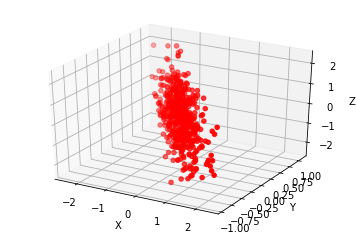

In [178]:
#plot original data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = X[0,:]
y = X[1,:]
z = X[2,:]

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

Text(0.5,0,'Z')

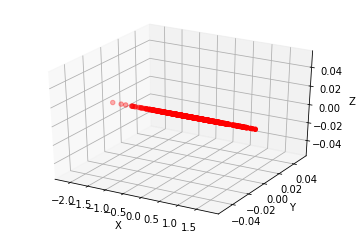

In [179]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = x_reconst1[0,:]
y = 0
z = 0

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [195]:
#Generation of Dataset #2
c = np.zeros((3,1))
for i in range(3):
    c[i,0] = gaussian()

In [196]:
#Generate random data using the model x = Av+c
X = np.zeros((3,500))
for i in range(500):
    v = np.matmul(A, [[gaussian()],[gaussian()]])
    for j in range(3):
        X[j,i] = v[j] + c[j, 0]
        
#Print rank of X to verify that it has increased
print(lin.matrix_rank(X))

3


In [197]:
#Compute top two principal components of X
X1 = X @ X.transpose()
vals, vecs = lin.eig(X1)
print("eigen values:\n", vals)
print("eigen vectors:\n", vecs)
#The eigenvectors corresponding to the two highest eigenvalues are the top two principal components. 
#In this case, it's the first and second entries in vecs
U1 = np.zeros((3,1))
U2 = np.zeros((3,1))
U = np.zeros((3,2))
for i in range(0,3):
    U1[i,0] = vecs[i,0]
    U2[i,0] = vecs[i,1]
#create U vector
for i in range(0,2):
    for j in range(0,3):
        U[j,i] = vecs[j,i]
        U[j,i] = vecs[j,i]
print("The first principal component of X is:\n", U1, "\nThe second principal component of X is:\n", U2)
print(U)

eigen values:
 [463.11808823 228.88651512  24.01672936]
eigen vectors:
 [[-0.65149207  0.59131081 -0.4752995 ]
 [ 0.28680166 -0.38804643 -0.87587943]
 [ 0.70235525  0.70694518 -0.08322025]]
The first principal component of X is:
 [[-0.65149207]
 [ 0.28680166]
 [ 0.70235525]] 
The second principal component of X is:
 [[ 0.59131081]
 [-0.38804643]
 [ 0.70694518]]
[[-0.65149207  0.59131081]
 [ 0.28680166 -0.38804643]
 [ 0.70235525  0.70694518]]


In [198]:
#Reconstruct original data
x_reconst = U @ U.transpose() @ X

#Compute representation error
rep_err = lin.norm(X - x_reconst, 'fro')**2
print(rep_err)
#As expected, this is nowhere close to 0 because we didn't center the data first

24.016729357850245


In [203]:
#Repeat steps but center data first
#Calculate mean vector
#initialize mean vector
m = np.zeros((3,1))
#Compute mean vector
for i in range(3):
    m[i,0] = np.mean(X[i,:])
    
print("mean vector: ", m)
#Center data
Xc = np.zeros((3,500))
for i in range (500):
    for j in range(3):
        Xc[j,i] = X[j,i] - m[j]

#Recalculate principal components
#Compute top two principal components of X
X1 = Xc @ Xc.transpose()
vals, vecs = lin.eig(X1)
print("eigen values:\n", vals)
print("eigen vectors:\n", vecs)
#The eigenvectors corresponding to the two highest eigenvalues are the top two principal components. 
#In this case, it's the first and second entries in vecs
U1 = np.zeros((3,1))
U2 = np.zeros((3,1))
U = np.zeros((3,2))
for i in range(0,3):
    U1[i,0] = vecs[i,0]
    U2[i,0] = vecs[i,1]
    
for i in range(0,2):
    for j in range(0,3):
        U[j,0] = vecs[j,0]
        U[j,1] = vecs[j,1]
print("The first principal component of X is:\n", U1, "\nThe second principal component of X is:\n", U2)
print(U)

mean vector:  [[ 0.13905651]
 [-0.28427024]
 [ 0.42396534]]
eigen values:
 [ 4.58037678e+02  1.18037206e+02 -2.72173348e-14]
eigen vectors:
 [[-0.69363846  0.66357898 -0.28022959]
 [ 0.33127194 -0.05158114 -0.94212435]
 [ 0.63962848  0.74632588  0.18404643]]
The first principal component of X is:
 [[-0.69363846]
 [ 0.33127194]
 [ 0.63962848]] 
The second principal component of X is:
 [[ 0.66357898]
 [-0.05158114]
 [ 0.74632588]]
[[-0.69363846  0.66357898]
 [ 0.33127194 -0.05158114]
 [ 0.63962848  0.74632588]]


In [204]:
#Recreate data. Xc has already been centered in the previous step, so no need to account for it here.
x_reconst_centered = U @ U.transpose() @ Xc
for i in range (500):
    x_reconst_centered[:,i] = x_reconst_centered[:,i] + m.transpose()

#calculate represntation error
rep_err = lin.norm(X - x_reconst_centered, 'fro')**2
print(rep_err)
#As expected, after centering the data, the representation error is once again very close to 0

1.0263704378227345e-28


In [225]:
#Generation of dataset 3
def gaussian1():
    return 1/np.sqrt(2*np.pi * 0.01) * np.exp(-((random.random()*(6) - 3)**2)/(2*0.01));

In [226]:
#generate random data according to X = Av + n
n = np.zeros((3,1))
X = np.zeros((3,500))
for i in range(500):
    for j in range(3):
        n[j,0] = gaussian1()
    for j in range(3):
        X[j,i] = v[j] + n[j, 0]


In [227]:
#Normalize data
for i in range(500):
    avg = 0
    for j in range(3):
        avg = X[j,i]**2 + avg
    X[:,i] = X[:,i]/np.sqrt(avg)
print(X)

[[ 0.17760578  0.57743823  0.57757404 ...  0.57743824  0.26671574
   0.98281003]
 [-0.09745629 -0.31860287 -0.31856538 ... -0.31860287  0.90126706
  -0.07204544]
 [ 0.97926424 -0.75170293 -0.75161448 ... -0.75170293 -0.34143872
  -0.16998206]]


In [228]:
#rank of normalized matrix
print(lin.matrix_rank(X))

#singular values of X
u, s, vh = lin.svd(X)
print(s)


3
[20.82274447  6.30078485  5.16850299]


Text(0.5,0,'Z')

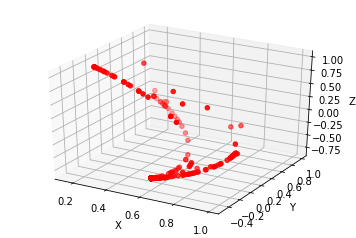

In [229]:
#PCA denoising
#Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = X[0,:]
y = X[1,:]
z = X[2,:]

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [230]:
#Calculate top two principal components
X1 = X @ X.transpose()
vals, vecs = lin.eig(X1)
print("eigen values:\n", vals)
print("eigen vectors:\n", vecs)
#The eigenvectors corresponding to the two highest eigenvalues are the top two principal components. 
#In this case, it's the first and second entries in vecs
U1 = np.zeros((3,1))
U2 = np.zeros((3,1))
U = np.zeros((3,2))
for i in range(0,3):
    U1[i,0] = vecs[i,0]
    U2[i,0] = vecs[i,1]
#create U vector
for i in range(0,2):
    for j in range(0,3):
        U[j,i] = vecs[j,i]
        U[j,i] = vecs[j,i]
print("The first principal component of X is:\n", U1, "\nThe second principal component of X is:\n", U2)
print(U)

eigen values:
 [433.58668708  39.69988973  26.71342319]
eigen vectors:
 [[-0.60420074  0.5857256  -0.54024716]
 [ 0.28480306 -0.47446818 -0.83292687]
 [ 0.74419667  0.65711907 -0.11985758]]
The first principal component of X is:
 [[-0.60420074]
 [ 0.28480306]
 [ 0.74419667]] 
The second principal component of X is:
 [[ 0.5857256 ]
 [-0.47446818]
 [ 0.65711907]]
[[-0.60420074  0.5857256 ]
 [ 0.28480306 -0.47446818]
 [ 0.74419667  0.65711907]]


Text(0.5,0,'Z')

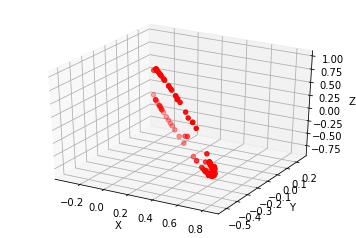

In [231]:
#Reconstruct data & plot
x_denoise = U @ U.transpose() @ X
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = x_denoise[0,:]
y = x_denoise[1,:]
z = x_denoise[2,:]

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [232]:
#Calculate representation error
rep_err = lin.norm(X - x_denoise, 'fro')**2
#verify that it's equal to square of third singular value
print("representative error: ", rep_err,"\tsquare of third singular value of X: ", s[2]**2)

representative error:  26.713423192481727 	square of third singular value of X:  26.713423192481734


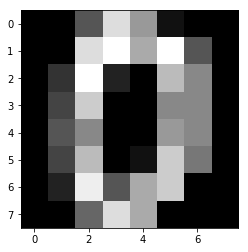

In [234]:
from sklearn.datasets import load_digits
images, labels = load_digits(1, return_X_y=True)
#Load and display the first image
image1 = images[0]
image = np.zeros((8,8))
#turn image into 8x8 matrix
image1 = image1.reshape(-1,8)        
plt.imshow(image1, cmap='gray')

#Transform matrix to represent one image per column
images=images.transpose()

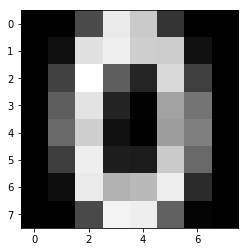

In [235]:
#Calculate mean vector
#each image is a column, each pixel is an entry in that column
m = np.zeros((64,1))
#for each row
for i in range(len(images)):
    m[i, 0] = np.mean(images[i,:])

#plot mean vector
plt.imshow(m.reshape(8,8), cmap='gray')

#initialized mean centered data matrix
X = np.zeros((len(images), len(images[0,:])))
#mean center the data
for i in range(0, len(images[0,:])):
    for j in range(0, len(images)):
        X[j,i] = images[j,i] - m[j]
        


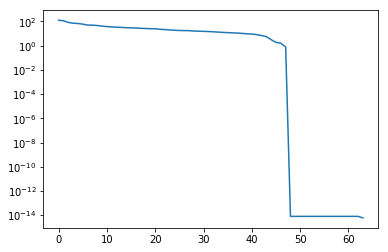

In [236]:
#Calculate svd of mean centered data
u, s, vh = lin.svd(X)

#plot singular values
plt.yscale('log')
plt.plot(s)

In [168]:
#Finding the smallest integer k
#We don't have the expected value of X, but we can estimate it by taking the mean.
#Then, we can calculate the variance via summation(Xi - m)/(n-1)
#However, our data was already mean centered, so the mean of each row of X will just be 0. 
#We can ignore the m term in the summation
#This k is significant because we are trying to find the smallest number of principal components we need.

In [237]:
#Calculate variance of each pixel
sum = 0
var = np.zeros((64,1))
for j in range(len(X)):
    sum = 0
    for i in range(0,len(X[j,:])):
        #Calculate E(X^2)
        sum = sum + (X[j,i])**2
    var[j] = sum/len(X[j,:] - 1)

sum = 0
#Now we can find k
k = 1
while sum < 90:
    sum = sum + var[k-1]
    k = k+1
print(k)

16


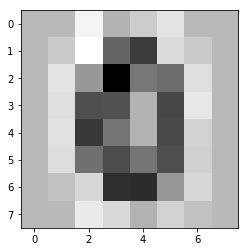

In [238]:
#So we need to calculate the k (in this case, 16, principal components)
X1 = X @ X.transpose()
vals, vecs = lin.eig(X1)
#these vectors are already sorted from greatest to least so the first 16 columns in vecs are our principal components
components = vecs[:,0:16]
#display first principal component as greyscale image
plt.imshow(components[:,0].reshape(8,8), cmap='gray')

Text(0.5,0,'Z')

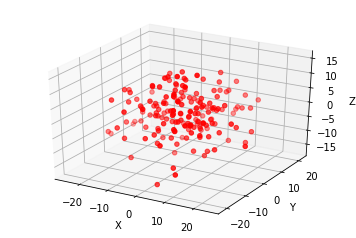

In [239]:
#Project data onto top 3 components
components3 = components[:,0:3]
x_feature = components3.transpose() @ X
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = x_feature[0,:]
y = x_feature[1,:]
z = x_feature[2,:]
ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [240]:
#Reconstruct original data
x_reconst = components3 @ x_feature
for i in range (len(x_reconst[0,:])):
    x_reconst[:,i] = x_reconst[:,i] + m.transpose()
    #x_reconst_centered[:,i] = x_reconst_centered[:,i] + m.transpose()
rep_err = lin.norm(X - x_reconst, 'fro')**2
print(rep_err)
print(s)
#Calculate representation error

618642.6342012426
[1.23693874e+02 1.11712201e+02 8.19791157e+01 7.02527593e+01
 6.67153832e+01 5.89764648e+01 4.97111010e+01 4.87700287e+01
 4.54465015e+01 4.05566562e+01 3.71560383e+01 3.50335919e+01
 3.27555465e+01 3.17821539e+01 2.99026828e+01 2.90882883e+01
 2.83569442e+01 2.67046566e+01 2.57298794e+01 2.47717440e+01
 2.46226414e+01 2.20337122e+01 2.11108728e+01 1.94635072e+01
 1.83800301e+01 1.77053564e+01 1.72955797e+01 1.70851910e+01
 1.58932377e+01 1.54169097e+01 1.50057468e+01 1.44238492e+01
 1.37915082e+01 1.30344444e+01 1.22335426e+01 1.17916557e+01
 1.11832812e+01 1.08506923e+01 1.00877322e+01 9.46940755e+00
 8.91349909e+00 8.07832373e+00 6.72416838e+00 5.50867146e+00
 3.06204543e+00 1.85071955e+00 1.57088750e+00 7.78872943e-01
 7.99963011e-15 7.99963011e-15 7.99963011e-15 7.99963011e-15
 7.99963011e-15 7.99963011e-15 7.99963011e-15 7.99963011e-15
 7.99963011e-15 7.99963011e-15 7.99963011e-15 7.99963011e-15
 7.99963011e-15 7.99963011e-15 7.99963011e-15 5.96502131e-15]


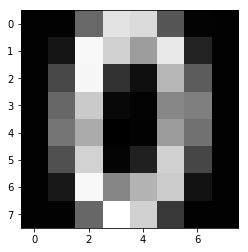

In [241]:
plt.imshow(x_reconst[:,0].reshape(8,8), cmap = 'gray')